In [2]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import io
import pandas as dataframe
import string
import nltk
from nltk import word_tokenize
import re
import sys
import os
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from IPython.display import display
import matplotlib.pyplot as plt

data = pd.read_csv('D:/twitter.csv', delimiter=",")
data.drop_duplicates()
data= data[(data['Bahasa']=="in")]
data=data[["Tweet","Kategori Tweet"]]
data.head()

,Tweet,Kategori Tweet
0,GOJEK KENAPA PELIT BANGET SAMA GUEEEEEEE ðŸ˜¢ð...,0
1,@BebalBoy @inimilkitaa @netflix @NetflixID @go...,0
2,Dikasih jalan buntu sama @gojekindonesia .Ini ...,0
3,@30SECVlDEOS @gojekindonesia tolong ini para d...,0
4,Egila ya marketingnya mantep bgt. Mau bgt kerj...,1


In [ ]:
raw = pd.read_csv(io.BytesIO(uploaded_2['Dataset_2.csv']), delimiter=",")

KeyError: ignored

In [ ]:
#Bar Chart
import seaborn as sns
bahasa=raw['Bahasa'].value_counts()
f, ax = plt.subplots(figsize=(15,6))
chart=sns.barplot(bahasa.index,bahasa.values,alpha=1, palette="Paired")
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()
type

NameError: ignored

In [5]:
data= data[(data['Bahasa']=="in")]
data=data[["Tweet","Kategori Tweet"]]
data.head()

,Tweet,Kategori Tweet
0,GOJEK KENAPA PELIT BANGET SAMA GUEEEEEEE ðŸ˜¢ð...,0
1,@BebalBoy @inimilkitaa @netflix @NetflixID @go...,0
2,Dikasih jalan buntu sama @gojekindonesia .Ini ...,0
3,@30SECVlDEOS @gojekindonesia tolong ini para d...,0
4,Egila ya marketingnya mantep bgt. Mau bgt kerj...,1


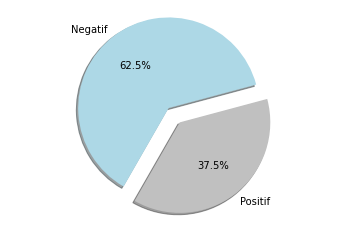

0    404
1    242
Name: Kategori Tweet, dtype: int64


In [4]:
#Pie Chart
type=data['Kategori Tweet'].value_counts()
my_labels = ['Negatif','Positif']
my_colors = ['lightblue','silver']
my_explode = (0, 0.2)
plt.pie(type, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.axis('equal')
plt.show()
print(type)

In [5]:
gjtweet = data['Tweet']
gjtweet

0      GOJEK KENAPA PELIT BANGET SAMA GUEEEEEEE ðŸ˜¢ð...
1      @BebalBoy @inimilkitaa @netflix @NetflixID @go...
2      Dikasih jalan buntu sama @gojekindonesia .Ini ...
3      @30SECVlDEOS @gojekindonesia tolong ini para d...
4      Egila ya marketingnya mantep bgt. Mau bgt kerj...
                             ...                        
724    @kitiiingman @Maxim_Indonesia @gojekindonesia ...
725    @viiinnnn_ DUH ANDA MH TINGGAL GOJEK 1 JAM JG ...
727    @gojekindonesia Min q nonton go play kok kuota...
728    @gojekindonesia serint dapet sms ke gini maksu...
729    @gojekindonesia @akurizki Min respon aku juga:...
Name: Tweet, Length: 646, dtype: object

In [6]:
#Menghapus link
gjtweet = gjtweet.apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))

#Menghapus username
gjtweet = gjtweet.apply(lambda x: re.sub(r'@\S+','',x))

#Menghapus simbol RT
gjtweet = gjtweet.apply(lambda x: re.sub(r'RT','',x))

#Menghapus hashtag
gjtweet = gjtweet.apply(lambda x: re.sub(r'#(\w+)','',x))

#Menghapus space enter
gjtweet = gjtweet.apply(lambda x: re.sub(r'\n',' ',x))

#Menghapus angka
gjtweet = gjtweet.apply(lambda x: re.sub(r'[0-9]', '', x))

#Menghapus tanda baca
gjtweet = gjtweet.apply(lambda x: re.sub(r'[^\w\s]','',x))

gjtweet.head()

0    GOJEK KENAPA PELIT BANGET SAMA GUEEEEEEE ðŸðŸ ...
1                                   Masih belum bisa  
2    Dikasih jalan buntu sama  Ini udah mau setaun ...
3      tolong ini para drivernya diingatkan untuk t...
4    Egila ya marketingnya mantep bgt Mau bgt kerja...
Name: Tweet, dtype: object

In [7]:
#Case Folding
gjcf = []
for line in gjtweet:
 result = line.lower()
 gjcf.append(result)

In [8]:
#Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
gjstemmed = map(lambda x: stemmer.stem(x),gjcf)
gj_no_punc = map(lambda x: x.translate(str.maketrans('','',string.punctuation)),gjstemmed)
gj_no_punc = list(gj_no_punc)

In [9]:
#Kata dengan Arti Sama
gjchange1 = []
for line in gj_no_punc:
 result = re.sub(r"adadmin","admin",line)
 gjchange1.append(result)

gjchange2 = []
for line in gjchange1:
 result = re.sub(r"adadmin","admin",line)
 gjchange2.append(result)

gjchange3 = []
for line in gjchange2:
 result = re.sub(r"admin","min",line)
 gjchange3.append(result)

gjchange4 = []
for line in gjchange3:
 result = re.sub(r"aplikasi","app",line)
 gjchange4.append(result)

gjchange5 = []
for line in gjchange4:
 result = re.sub(r"dpt","dapet",line)
 gjchange5.append(result)

gjchange6 = []
for line in gjchange5:
 result = re.sub(r"gak","ga",line)
 gjchange6.append(result)
 
gjchange7 = []
for line in gjchange6:
 result = re.sub(r"gk","ga",line)
 gjchange7.append(result)

gjchange8 = []
for line in gjchange7:
 result = re.sub(r"ngasih","kasih",line)
 gjchange8.append(result)

gjchange9 = []
for line in gjchange8:
 result = re.sub(r"pakai","pake",line)
 gjchange9.append(result)

gjchange10 = []
for line in gjchange9:
 result = re.sub(r"skrg","sekarang",line)
 gjchange10.append(result)

In [10]:
# Stopwords
import nltk
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
nltk.download('punkt')
factory = StopWordRemoverFactory()
stopword1 = factory.get_stop_words()
moresw=['gueeeeeee', 'lah', 'tu', 'ajaaaaa', 'ihh', 'bet', 'ya', 'dong', 'pls', 'nyata','padahal',
        'kok', 'dung', 'ko', 'eh', 'kan', 'nya', 'nah', 'ni', 'hallo', 'an', 'dah',
        'ke', 'tai', 'atuh', 'sih', 'gue', 'saya', 'hai', 'd', 'aku', 'aj', 'kah',
        'siii', 'om', 'this', 'maskkkkk', 'nge', 'gadak', 'hi', 'sy', 'jga', 'kata','kaya',
        'ANJJJJJJ', 'lg', 'or', 'mamam', 'nih', 'njirr', 'klo', 'g', 'dongg', 'kerja',
        'anjg', 'x', 'bgtt', 'anjrit', 'lo', 'sialan', 'gw', 'gt', 'rb', 'lu', 'pas','pernah',
        'u', 'si', 'trims', 'kak', 'yaa', 'ku', 'siii', 'ny', 'w', 'gin','gitu','gua','jadi','kalau','kalo','kamu','kantor',
        'ye', 'teu', 'ngarti', 'deh', 'tuh', 'duuuuh', 'dear', 'huhu', 'bgd', 'lebih',
        'napa', 'duh', 'yaampun', 'nonono', 'ak', 'ae', 'yah', 'hdeh', 'mah', 'ay','gdulu',
        'dg', 'pulo', 'minto', 'pd', 'pak', 'nyo', 'gaa', 'mo', 'anying', 'p', 'lewat',
        'sib', 'egk', 'sat', 'set', 'bat', 'dey', 'haha', 'wkwk', 'anyink', 'bgt','banget','begini','biar','buat','cuma',
        'shshdjdjdjdk', 'anyep', 'weeeh', 'naek', 'dr', 'tbtb', 'lgi', 'bib', 'mas','sen','tapi','tp','terus','trs',
        'lagiiii', 'WKWKWKWKW', 'WKWKWKWKWKWKKWWKWKWKWKWKWKWKKWKWKWKWKWKKWKWKWKWKWK','suruh','udah','udh',
        'kaka', 'ampe', 'wwww', 'toh', 'gaes', 'dooong', 'kaa', 'ka', 'bj', 'km', 'y', 'rumah','yg'
        'hihi', 'mbak', 'SHSHHSHS', 'bib', 'tks', 'heheheh', 'jek', 'tlol', 'weeii','dong','gin','gua','halo','lalu', 
        'bangsattttttttt', 'yaaalllaaaaaaaah', 'asu', 'riz', 'na', 'euy', 'aya', 'aja','apa',
        'WKWKWKKWKW', 'aduh', 'nder', 'kah', 'hhh','hhh','ya','q','jg','kah','min','nya','ayooo','hooh','hi','kan','owe','baaaaangg','nya','jg','iya','laahh','yaa','u','yuhuuuu','icaaaaa','the','wkwkwk','jd','he','pagi','anjir','nah','thx','cok','bro','y','doang',
        'ibu', 'pake', 'ttg', 'tip', 'klik', 'bikin', 'make', 'sayang', 'sori', 'engga', 'sbg', 'sama', 'mau', 'masuk', 'hari', 'ken', 'sir', 'culik', 'sma', 'hei', 'wts', 'ppl', 'tpi', 'pul', 'liat', 'bri', 'sii', 'ijo', 'ktp', 'hola', 'like', 'hilal', 'wow',
        'tdk', 'dih', 'kakak', 'beri', 'ikit', 'luar', 'alat', 'jco', 'bobo', 'doa', 'sdh', 'tali', 'tak', 'pke', 'tlg', 'hati', 'asa', 'sak', 'sik', 'rudet', 'taun', 'voc', 'isa', 'dri', 'pol', 'btul', 'cri', 'blj', 'lha', 'pdhl', 'utk', 'yuk', 'adu', 'doi', 'sila',
        'loh', 'siapa', 'tau', 'atas', 'tes', 'buru', 'knp','tpi','orang','bahkan','cuman','sadar','bisapesen','kayak','gmn','bapak','mana','plis','lindung','asli','nomer','sayang','dipake','via','tau','ongair','lha','sik','kaga','diri','hari','blm','make','tele','pke',
        'tak','tetep','tlg','sbg','sama','sekarang','bayar','kemarin','emang','agustus']
sw = stopword1 + moresw
dictionary = ArrayDictionary(sw)
strw = StopWordRemover(dictionary)
removestop=[]
for line in gjchange10 :
 word_token = nltk.word_tokenize(line)
 word_token = [word for word in word_token if not word in
sw]
 removestop.append(" ".join(word_token))
gjtoken=[]
for line in removestop :
 b = nltk.word_tokenize(line)
 gjtoken.append(b)
token_df=pd.DataFrame(gjtoken)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
removestop = pd.DataFrame (removestop, columns = ['tweet'])
tw=removestop.merge(data['Kategori Tweet'], how='left',on=removestop.index)
tw=tw.drop(['key_0'],axis=1)
tw.to_csv('tw.csv')
files.download('tw.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tw=removestop.merge(data['Kategori Tweet'], how='left',on=removestop.index)
tw=tw.drop(['key_0'],axis=1)
tw.tail()

,tweet,Kategori Tweet
641,ga bandingin awal gojek kecewa soal,1
642,mh tinggal gojek jam nyampe,1
643,nonton go play kuota msh sedot,0
644,serint dapet sms maksutny,0
645,respon,0


In [11]:
#Vektorisasi Variabel TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer(min_df=10)
DTM = vectorizer.fit_transform(removestop)
DTM_ = pd.DataFrame(DTM.toarray(), columns = vectorizer.get_feature_names())
vectorizer1 = TfidfVectorizer(use_idf=True, norm='l2')
matrix1 = vectorizer1.fit_transform(removestop)
int_matrix1=matrix1.astype(np.int64)
tfidf1 = pd.DataFrame(matrix1.toarray(), columns=vectorizer1.get_feature_names())
tfidf_df1=pd.concat([gjtweet,tfidf1], axis=1)
tfidf_train = (matrix1.toarray())
print(tfidf_train)
print(tfidf_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(646, 1910)


In [ ]:
DTM_.tail()

,akhir,akun,app,baik,bantu,banyak,baru,beli,biasa,buka,bukan,cancel,cashback,cek,cs,customer,dapet,diskon,dm,driver,email,enak,ga,gabisa,gimana,go,gofood,gojek,gopay,grab,harga,hubung,isi,jalan,jam,jauh,jelas,kali,kasih,kirim,laku,lama,makan,malah,masa,minta,mitra,mohon,murah,naik,ngga,nomor,order,pesan,potong,promo,pulsa,resto,salah,saldo,sampe,sekali,selalu,semua,sistem,soal,suka,susah,tadi,terima,tiap,voucher,yg
641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
fix=DTM_.merge(data['Kategori Tweet'], how='left',on=DTM_.index)
fix.tail()

,key_0,akhir,akun,app,baik,bantu,banyak,baru,beli,biasa,...,sistem,soal,suka,susah,tadi,terima,tiap,voucher,yg,Kategori Tweet
641,641,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
642,642,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
643,643,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
644,644,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
645,645,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
fix=fix.drop(['key_0'], axis = 1)
fix.tail()

,akhir,akun,app,baik,bantu,banyak,baru,beli,biasa,buka,...,sistem,soal,suka,susah,tadi,terima,tiap,voucher,yg,Kategori Tweet
641,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fix.to_csv('fix.csv')
files.download('fix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from __future__ import print_function
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,KFold,ShuffleSplit,StratifiedShuffleSplit
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [15]:
gjsentimen = fix['Kategori Tweet']
gjsentimen.head()

0    0
1    0
2    0
3    0
4    1
Name: Kategori Tweet, dtype: int64

In [16]:
tweet=fix.drop("Kategori Tweet",axis=1)

In [17]:
#Metode CV
kf5 = KFold(n_splits=5, shuffle=False)
kf5.get_n_splits(tweet,gjsentimen)

Kfold=KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf5.split(gjsentimen):
    x_train_1, x_test_1 = tweet.iloc[train_index], tweet.iloc[test_index]
    y_train_1, y_test_1 = gjsentimen[train_index], gjsentimen[test_index]

In [47]:
### METODE CV ###
#SVM Linear
#DATA TRAINING
svclassifier_linear_2 =  SVC(kernel='linear')
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    svclassifier_linear_2 = svclassifier_linear_2.fit(x_train_1,y_train_1)
    y_pred2 = svclassifier_linear_2.predict(x_train_1)
    cm.append((confusion_matrix(y_train_1, y_pred2)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi2=np.mean(ac)
spesifisiti2=np.mean(sp)
sensitiviti2=np.mean(se)

df_k2=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k2=pd.concat([df_k2,pd.DataFrame(test[i])],axis=1)
df_k2.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k2

#menghitung auc
auc_svmlinear2= round(roc_auc_score(y_train_1, y_pred2)*100, 2)
auc_svmlinear2

presisi = model_selection.cross_val_score(svclassifier_linear_2, x_train_1, y_pred2, cv=Kfold, scoring='precision')
Presisi=presisi.mean()

print("Accuracy: %.2f%%" % (akurasi2*100.0))
print("Spesification: %.2f%%" % (spesifisiti2*100.0))
print("Sensitivity: %.2f%%" % (sensitiviti2*100.0))
print("Precision: %.2f%%" % (Presisi*100.0))
print("AUC: %.2f%%" % (auc_svmlinear2))

Accuracy: 80.66%
Spesification: 50.93%
Sensitivity: 94.10%
Precision: 77.70%
AUC: 72.52%


In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train_1, y_pred2))
print(classification_report(y_train_1, y_pred2))

[[335  21]
 [ 79  82]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       356
           1       0.80      0.51      0.62       161

    accuracy                           0.81       517
   macro avg       0.80      0.73      0.75       517
weighted avg       0.81      0.81      0.79       517



In [49]:
print(confusion_matrix(y_train_1, y_pred2))

[[335  21]
 [ 79  82]]


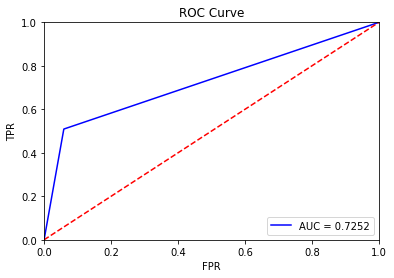

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

false_positive_rate1, true_positive_rate1, thresholds=roc_curve(y_train_1, y_pred2)
roc_auc3 = auc(false_positive_rate1, true_positive_rate1)
roc_auc3
 
plt.plot(false_positive_rate1, true_positive_rate1, "b", label='AUC = %0.4f' % roc_auc3)
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--') #garis linier merah
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [50]:
### METODE CV ###
#SVM Linear
#DATA TESTING
svclassifier_linear =  SVC(kernel='linear')
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    svclassifier_linear = svclassifier_linear.fit(x_train_1,y_train_1)
    y_pred1 = svclassifier_linear.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred1)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi1=np.mean(ac)
spesifisiti1=np.mean(sp)
sensitiviti1=np.mean(se)

df_k4=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k4=pd.concat([df_k4,pd.DataFrame(test[i])],axis=1)
df_k4.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k4

#menghitung auc
auc_svmlinear1= round(roc_auc_score(y_test_1, y_pred1)*100, 2)
auc_svmlinear1

presisi = model_selection.cross_val_score(svclassifier_linear, x_test_1, y_pred1, cv=Kfold, scoring='precision')
Presisi=presisi.mean()

print("Accuracy: %.2f%%" % (akurasi1*100.0))
print("Spesification: %.2f%%" % (spesifisiti1*100.0))
print("Sensitivity: %.2f%%" % (sensitiviti1*100.0))
print("Precision: %.2f%%" % (Presisi*100.0))
print("AUC: %.2f%%" % (auc_svmlinear1))

Accuracy: 53.49%
Spesification: 30.86%
Sensitivity: 91.67%
Precision: 83.43%
AUC: 61.27%


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_1, y_pred1))
print(classification_report(y_test_1, y_pred1))

[[44  4]
 [56 25]]
              precision    recall  f1-score   support

           0       0.44      0.92      0.59        48
           1       0.86      0.31      0.45        81

    accuracy                           0.53       129
   macro avg       0.65      0.61      0.52       129
weighted avg       0.71      0.53      0.51       129



In [52]:
print(confusion_matrix(y_test_1, y_pred1))

[[44  4]
 [56 25]]


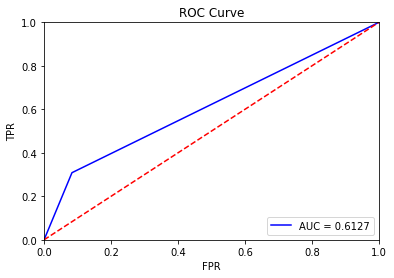

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

false_positive_rate3, true_positive_rate3, thresholds=roc_curve(y_test_1, y_pred1)
roc_auc1 = auc(false_positive_rate3, true_positive_rate3)
roc_auc1
 
plt.plot(false_positive_rate3, true_positive_rate3, "b", label='AUC = %0.4f' % roc_auc1)
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--') #garis linier merah
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [18]:
### METODE CV ###
#NB
#DATA TRAINING

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import BernoulliNB

NB_train =  BernoulliNB()

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    NB_train = NB_train.fit(x_train_1,y_train_1)
    y_pred3 = NB_train.predict(x_train_1)
    cm.append((confusion_matrix(y_train_1, y_pred3)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)

df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

#menghitung auc
auc_NB_train= round(roc_auc_score(y_train_1, y_pred3)*100, 2)
auc_NB_train

presisi = model_selection.cross_val_score(NB_train, x_train_1, y_pred3, cv=Kfold, scoring='precision')
Presisi=presisi.mean()

print("Accuracy: %.2f%%" % (akurasi3*100.0))
print("Spesification: %.2f%%" % (spesifisiti3*100.0))
print("Sensitivity: %.2f%%" % (sensitiviti3*100.0))
print("Precision: %.2f%%" % (Presisi*100.0))
print("AUC: %.2f%%" % (auc_NB_train))

Accuracy: 77.56%
Spesification: 72.05%
Sensitivity: 80.06%
Precision: 84.95%
AUC: 76.05%


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train_1, y_pred3))
print(classification_report(y_train_1, y_pred3))

[[285  71]
 [ 45 116]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       356
           1       0.62      0.72      0.67       161

    accuracy                           0.78       517
   macro avg       0.74      0.76      0.75       517
weighted avg       0.79      0.78      0.78       517



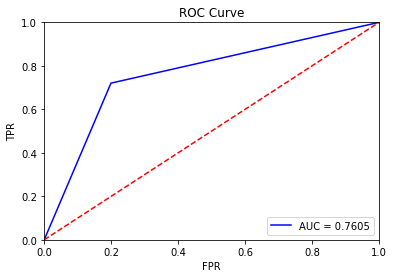

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

false_positive_rate4, true_positive_rate4, thresholds=roc_curve(y_train_1, y_pred3)
roc_auc3 = auc(false_positive_rate4, true_positive_rate4)
roc_auc3
 
plt.plot(false_positive_rate4, true_positive_rate4, "b", label='AUC = %0.4f' % roc_auc3)
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--') #garis linier merah
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [22]:
### METODE CV ###
#NB
#DATA TESTING

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import BernoulliNB

NB_test =  BernoulliNB()

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    NB_test = NB_test.fit(x_test_1,y_test_1)
    y_pred4 = NB_test.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred4)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi4=np.mean(ac)
spesifisiti4=np.mean(sp)
sensitiviti4=np.mean(se)

df_k5=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k5=pd.concat([df_k5,pd.DataFrame(test[i])],axis=1)
df_k5.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k5

#menghitung auc
auc_NB_test= round(roc_auc_score(y_test_1, y_pred4)*100, 2)
auc_NB_test

presisi = model_selection.cross_val_score(NB_test, x_test_1, y_pred4, cv=Kfold, scoring='precision')
Presisi=presisi.mean()

print("Accuracy: %.2f%%" % (akurasi4*100.0))
print("Spesification: %.2f%%" % (spesifisiti4*100.0))
print("Sensitivity: %.2f%%" % (sensitiviti4*100.0))
print("Precision: %.2f%%" % (Presisi*100.0))
print("AUC: %.2f%%" % (auc_NB_test))

Accuracy: 83.72%
Spesification: 97.53%
Sensitivity: 60.42%
Precision: 87.03%
AUC: 78.97%


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_1, y_pred4))
print(classification_report(y_test_1, y_pred4))

[[29 19]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.94      0.60      0.73        48
           1       0.81      0.98      0.88        81

    accuracy                           0.84       129
   macro avg       0.87      0.79      0.81       129
weighted avg       0.85      0.84      0.83       129



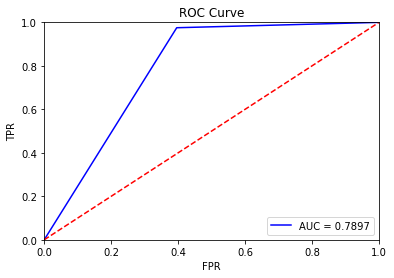

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

false_positive_rate5, true_positive_rate5, thresholds=roc_curve(y_test_1, y_pred4)
roc_auc4 = auc(false_positive_rate5, true_positive_rate5)
roc_auc4
 
plt.plot(false_positive_rate5, true_positive_rate5, "b", label='AUC = %0.4f' % roc_auc4)
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--') #garis linier merah
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.naive_bayes import BernoulliNB
x=fix.drop(['Kategori Tweet'],axis=1)
y=fix['Kategori Tweet']
kfold = KFold(n_splits=5)
model_kfold = BernoulliNB()
akurasi = model_selection.cross_val_score(model_kfold, x, y, cv=kfold, scoring='accuracy')
presisi = model_selection.cross_val_score(model_kfold, x, y, cv=kfold, scoring='precision')
sensitifitas = model_selection.cross_val_score(model_kfold, x, y, cv=kfold, scoring='recall')
Akurasi=akurasi.mean()
Presisi=presisi.mean()
Sensitifitas=sensitifitas.mean()
print("Accuracy: %.2f%%" % (Akurasi*100.0))
print("Precision: %.2f%%" % (Presisi*100.0))
print("Sensitivity: %.2f%%" % (Sensitifitas*100.0))

Accuracy: 69.35%
Precision: 57.59%
Sensitivity: 64.79%


In [ ]:
from sklearn.feature_selection import SelectKBest
mk=model_kfold.fit(x,y)
y_pred=mk.predict(x)
from sklearn.metrics import roc_curve, auc
false_positive_rate2, true_positive_rate2, thresholds=roc_curve(y, y_pred)
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
roc_auc2

0.7328573766467555

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[300 104]
 [ 67 175]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       404
           1       0.63      0.72      0.67       242

    accuracy                           0.74       646
   macro avg       0.72      0.73      0.72       646
weighted avg       0.75      0.74      0.74       646



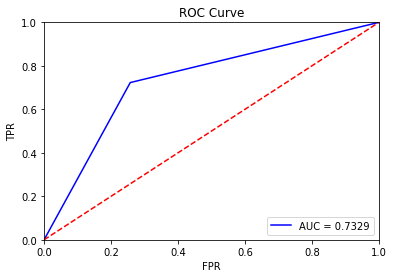

In [ ]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
    
plt.plot(false_positive_rate2, true_positive_rate2, "b", label='AUC = %0.4f' % roc_auc2)
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--') #garis linier merah
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()